In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install imageio

In [0]:
import numpy as np
from imageio import imread
from skimage.transform import resize
import os
import pandas as pd
 
train = pd.read_csv('train.csv')
newid = [str(i) for i in train['Id']]
newid = [i+'.jpg' for i in newid]  
  
width, height = 300,400
 
file = os.listdir()
# file.remove('.config')
# file.remove('sample_data')
# file.remove('drive')
images = [imread(j) for j in newid]
resized = [resize(i, (width, height)) for i in images]
images = np.array(resized)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


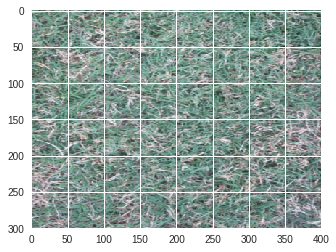

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(images[155])

In [0]:
file.remove('.config')
file.remove('sample_data')
file.remove('drive')
file.remove('train.csv')
# ID = [i.replace('.jpg', '') for i in file]
# ID = [int(i) for i in ID]

In [0]:
ID = [i for i in file]
new = [i for i in newid]
test = np.setdiff1d(ID, new)

In [0]:
testid = [i.replace('.jpg', '') for i in test]
testid = [int(i) for i in testid]
len(testid)

528

In [0]:
width, height = 300,400

testimages = [imread(j) for j in test]
resized = [resize(i, (width, height)) for i in testimages]
testimages = np.array(resized)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


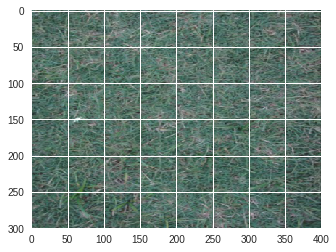

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(testimages[99])

In [0]:
y = train['DGCI']

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(images, y, test_size = 0.15, random_state=3)

In [0]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (300,400,3)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(100, activation = "relu"))
model.add(Dense(200, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(1))

In [0]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error', metrics=["accuracy"])

In [0]:
 learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.25, 
                                            min_lr=0.0001)

epochs = 30 
batch_size = 10

In [0]:
history = model.fit(X_train,Y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2)

In [0]:
results2 = model.predict(testimages) 

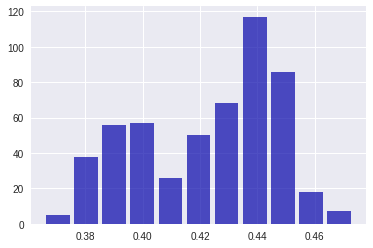

In [0]:
plt.hist(x=results2, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.show()

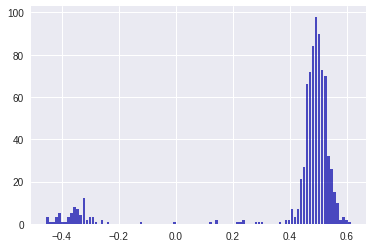

In [0]:
plt.hist(x=train['DGCI'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.show()

In [0]:
testid = pd.DataFrame(testid)
testid.columns = ['Id']
results =  pd.DataFrame(results2)
results.columns = ['DGCI']

In [0]:
submission = pd.concat([testid,results],axis = 1)
submission.to_csv("dgci_predicted.csv",index=False)